# (Loan Analysis using Prosper Loan Data)
## by (Adel Abu Hashim)
## sep 2020

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

        > This data dictionary explains the variables in the data set.
        > You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load data into data frame
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Data Assessing

In [4]:
# df shape
loan_df.shape

(113937, 81)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

We have a lot of Null Vlaues

In [6]:
Nulls = loan_df.isnull().sum().sort_values(ascending =False)
Nulls = Nulls[Nulls > 0]
Nulls

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPaymentsLessThanOneMonthLate     91852
ProsperPaymentsOneMonthPlusLate         91852
OnTimeProsperPayments                   91852
TotalProsperPaymentsBilled              91852
TotalProsperLoans                       91852
ProsperPrincipalBorrowed                91852
ProsperPrincipalOutstanding             91852
CreditGrade                             84984
ClosedDate                              58848
EstimatedEffectiveYield                 29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
EstimatedLoss                           29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
AmountDelinquent                         7622
BankcardUtilization               

We can see pattern of Nulls' counts here!

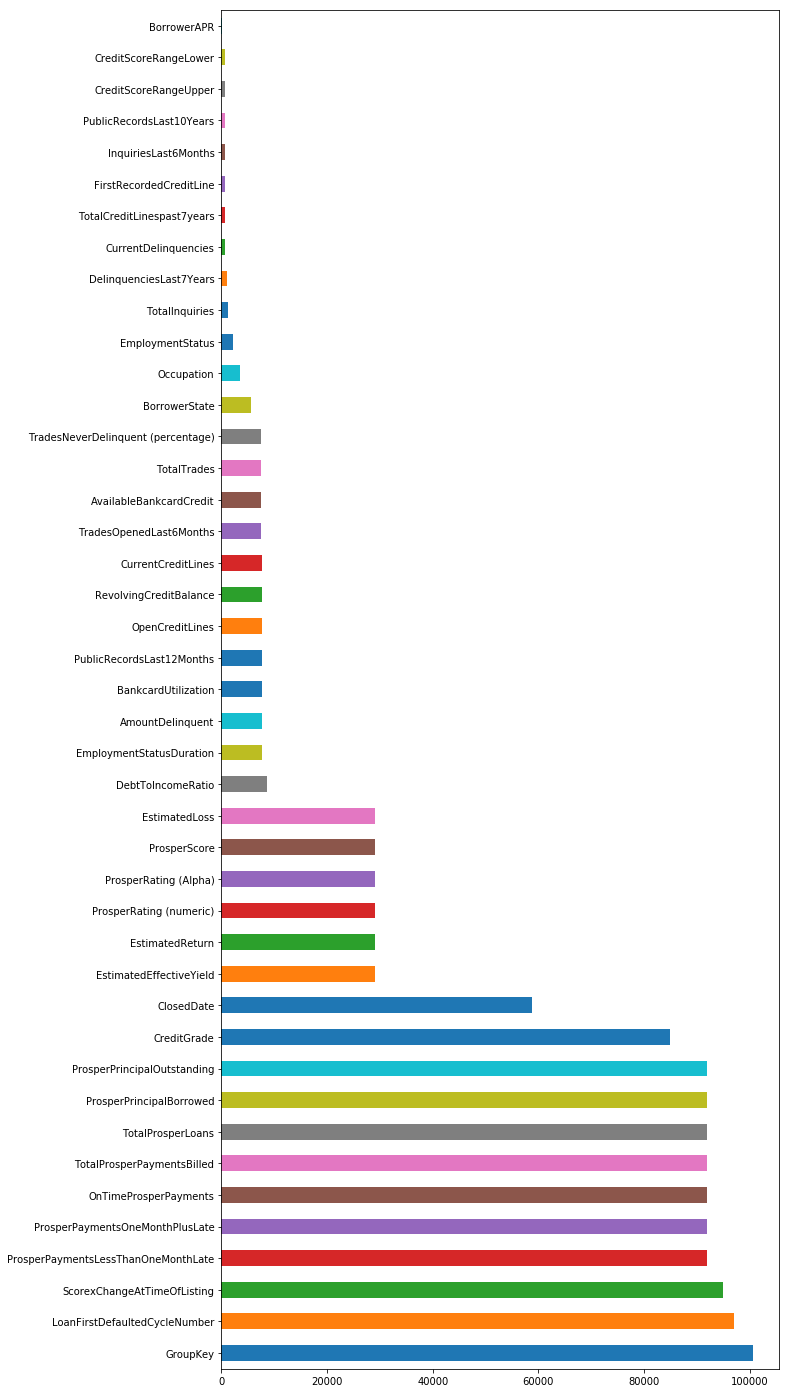

In [7]:
Nulls.plot(kind='barh', figsize=(10, 25))

### What is the structure of your dataset?

> The data has 113937 record with 81 features.
> The 81 features are:

In [8]:
# columns names
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [9]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [10]:
# print 0 Null columns due to choose the columns of interest
Not_nulls = loan_df.isnull().sum().sort_values()
Not_nulls = Not_nulls[Not_nulls == 0]
Not_nulls

ListingKey                         0
InvestmentFromFriendsAmount        0
IncomeRange                        0
IncomeVerifiable                   0
StatedMonthlyIncome                0
LoanKey                            0
LoanCurrentDaysDelinquent          0
LoanMonthsSinceOrigination         0
LoanNumber                         0
LoanOriginalAmount                 0
LoanOriginationDate                0
LoanOriginationQuarter             0
OpenRevolvingMonthlyPayment        0
MemberKey                          0
LP_CustomerPayments                0
LP_CustomerPrincipalPayments       0
LP_InterestandFees                 0
LP_ServiceFees                     0
LP_CollectionFees                  0
LP_GrossPrincipalLoss              0
LP_NetPrincipalLoss                0
LP_NonPrincipalRecoverypayments    0
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
MonthlyLoanPayment                 0
OpenRevolvingAccounts              0
I

In [11]:
#columns of interest
cols_of_intrest = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan_sub = loan_df[cols_of_intrest]
loan_sub

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed
5,15000,0.15425,8333.333333,60,B,Employed
6,3000,0.31032,2083.333333,36,E,Employed
7,10000,0.23939,3355.750000,36,C,Employed
8,10000,0.07620,3333.333333,36,AA,Employed
9,10000,0.07620,3333.333333,36,AA,Employed




### What is/are the main feature(s) of interest in your dataset?

> Loan Amount and Loan Number

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> BorrowRating, Monthly Income

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## Number of Loans Due to Income Rate

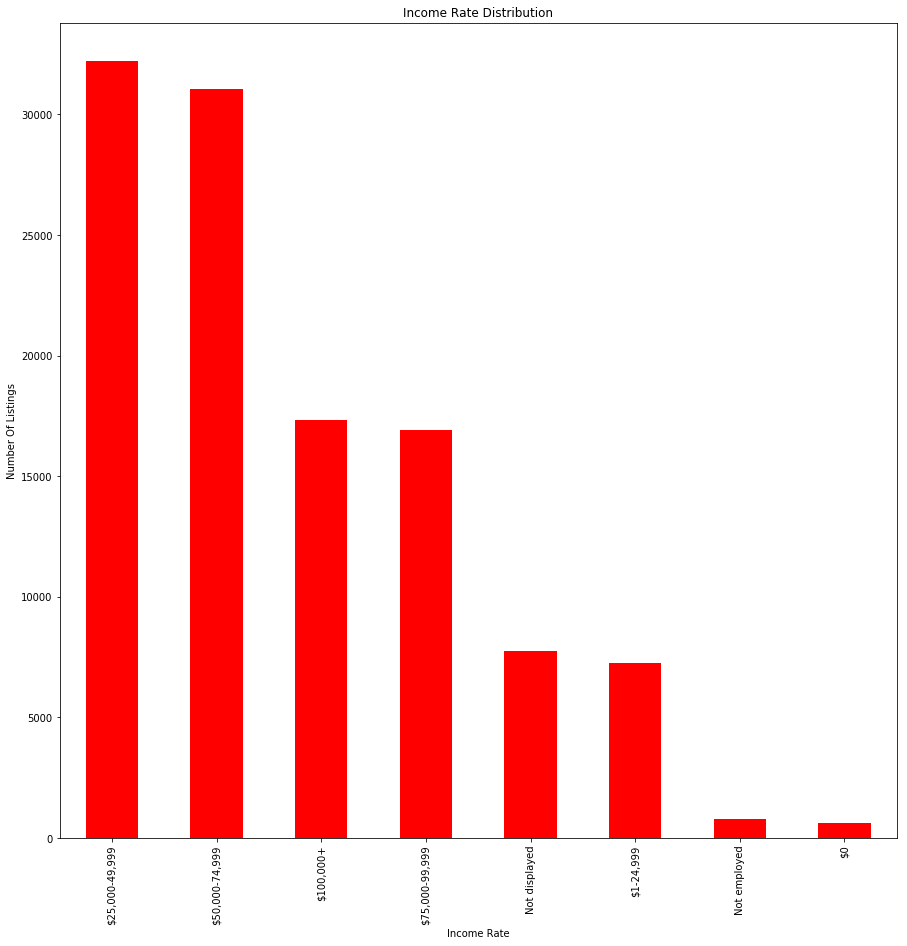

In [12]:
#Bar Graph for each income range specified

plt.figure(figsize=(10, 5))
loan_df.IncomeRange.value_counts().plot(kind='bar', color='red', figsize=(15,15));

plt.title('Income Rate Distribution');
plt.xlabel('Income Rate');
plt.ylabel('Number Of Listings');

plt.xticks();

**Number of loans** have a propotional relation with the **incomeRate**

## Top 10 Occupations in Loans

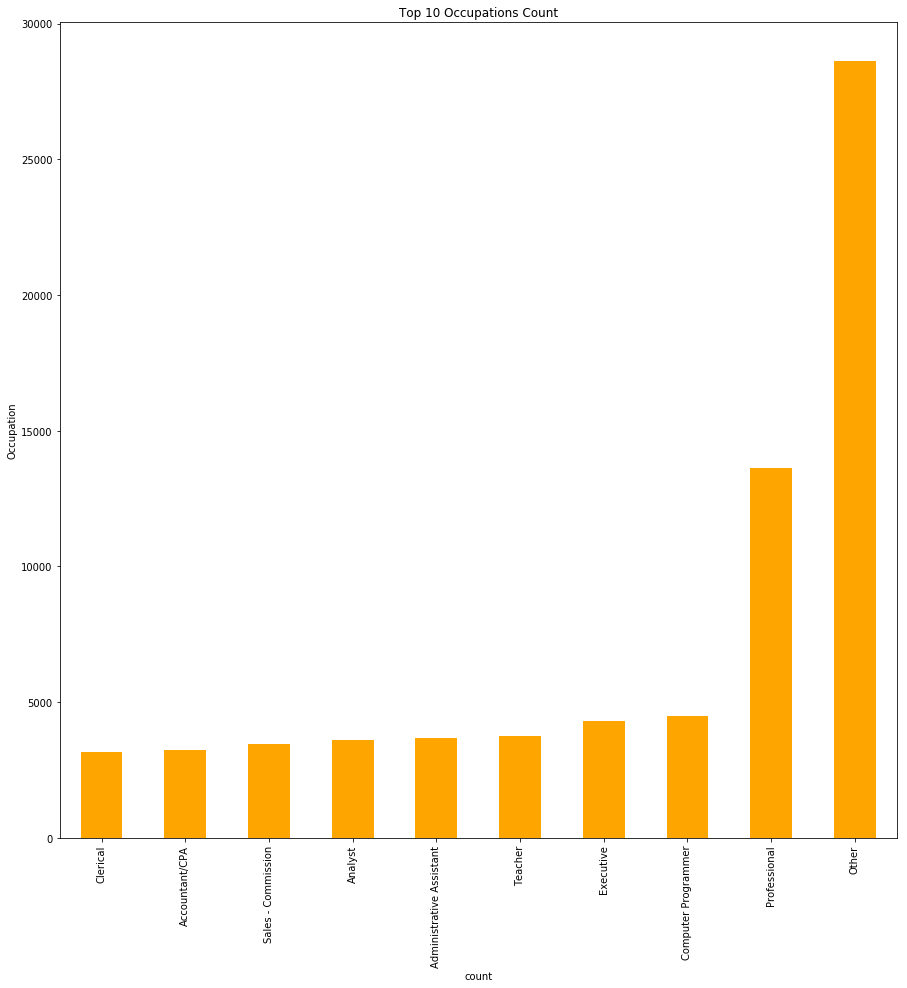

In [13]:
# see the top 10 occupations of borrowers in ascending order
loan_df['Occupation'].value_counts()[9::-1].plot(kind='bar', rot=90, color='orange', figsize=(15, 15))
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12

**other** ocuppation people made more loans; they mamy don't have constant job, have own small bussienss; which lead to loan.


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

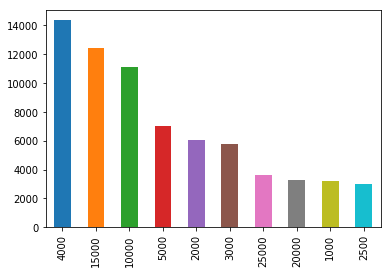

In [29]:
loan_df['LoanOriginalAmount'].value_counts()[:10].plot(kind='bar')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> NO, but we may make them as ranges

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> So many null values showed in 7th cell

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Yearly Borrower Rates

In [14]:
# extract year from date
loan_df['year'] = pd.DatetimeIndex(loan_df['LoanOriginationDate']).year
loan_df['year'].head()

0    2007
1    2014
2    2007
3    2012
4    2013
Name: year, dtype: int64

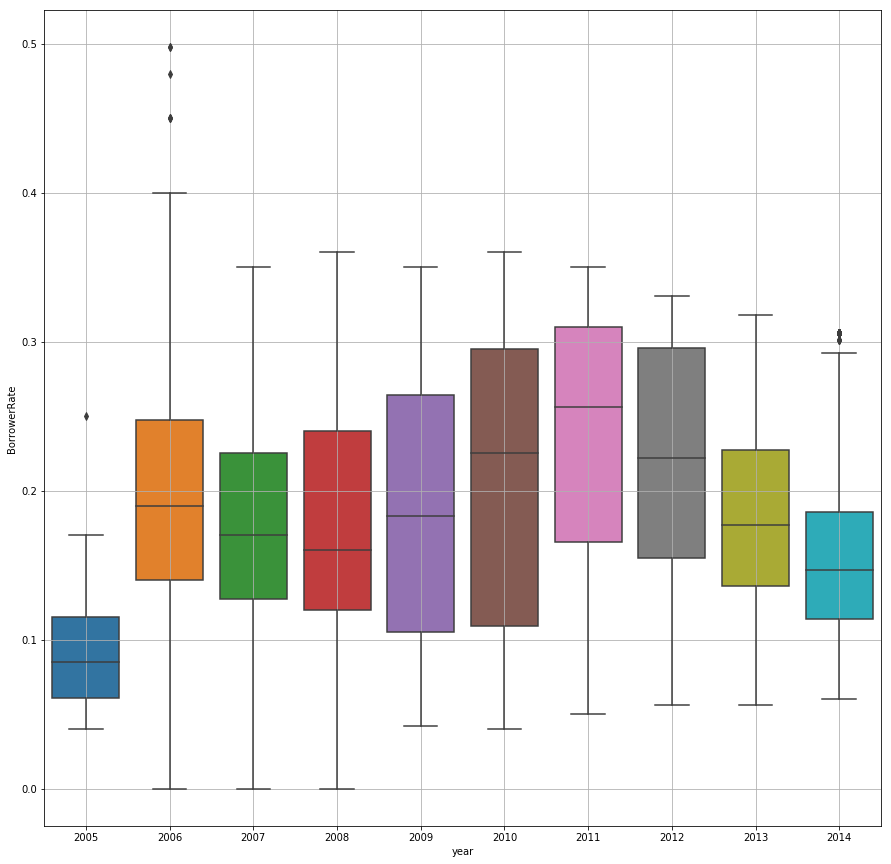

In [15]:
plt.figure(figsize=(15,15))
sb.boxplot(data = loan_df , x = 'year' , y='BorrowerRate')
plt.grid()

Borrower rates are ranged mostly from (10 - 30)%

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Heatmap of features 9f interest

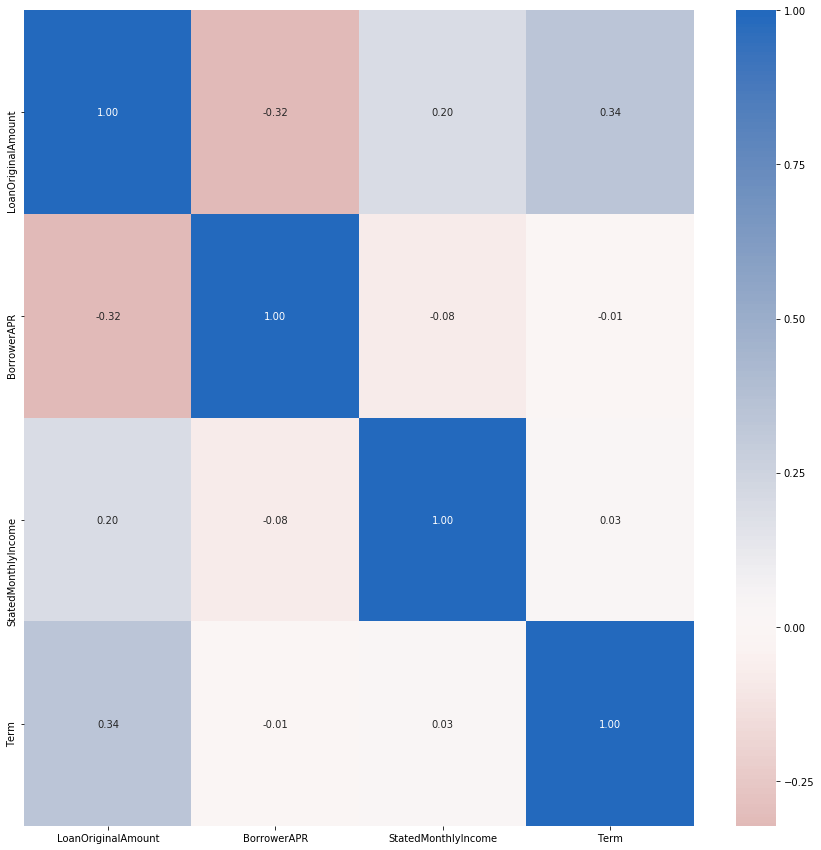

In [16]:
plt.figure(figsize=(15,15))
sb.heatmap(loan_sub.corr() , annot =True ,  fmt = '.2f',cmap = 'vlag_r', center = 0)

we can't see a strong correlation!

# What is the effect of occupation on loan amount 

In [17]:
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [18]:
loan_sub.columns


Index(['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term',
       'ProsperRating (Alpha)', 'EmploymentStatus'],
      dtype='object')

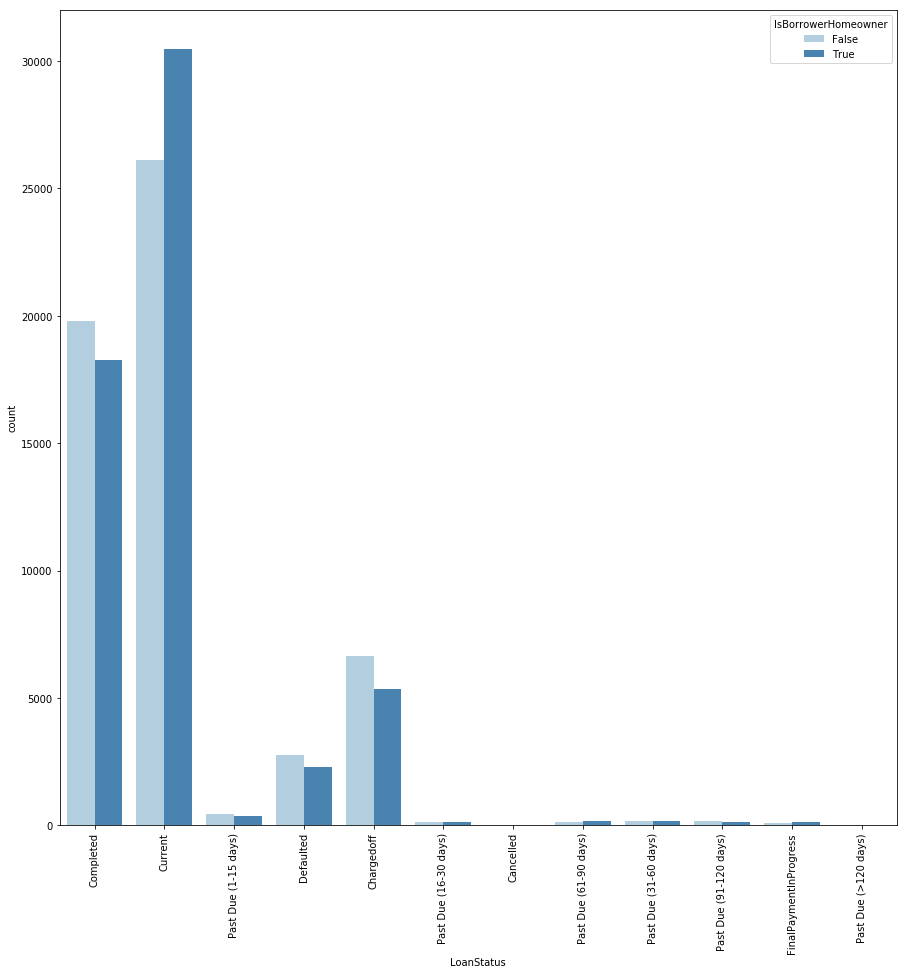

In [24]:
# LoanStatus vs IsBorrowerHomeOwner
plt.figure(figsize = [15, 15])

sb.countplot(data = loan_df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues')
plt.xticks(rotation=90);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this multivariate analysis, I expected to find those who don't have homes (non home owners) to request a Loan
### Were there any interesting or surprising interactions between features?

> The current requests from homeowners are more than non home owners!


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!